# Банки — Анализ оттока клиентов.

    
# Декомпозиция.


# Задача :

Проанализируйте клиентов регионального банка и выделите портрет клиентов, которые склонны уходить из банка.

1) Загрузка данных и предоработка данных
   - Исследовать пропущенные значения;
   - Исследовать соответствие типов;
   - Исследовать дубликаты;
   - Проверить корректность наименований колонок;
   - Переименовать колонки;
   - Удалить дубликаты;
   - Привести типы;
   - Заменить пропущенные значения;
      
2) Исследовательский анализ данных 
   - Исследовать признаки, изучить средние значения и стандартные отклонения;
   - Исследовать выбросы;
   - Удалить некорректные данные при необходимости;
   
3) Портрет клиента
   - Разбить клиентов на группы;
   - Посмотреть на средние значения признаков в группах; 
   - Построить графики и распределения признаков для тех;
   - Построить матрицу корреляций;
   - Опиcать портрет клиента;
   - Построить модель прогнозирования оттока пользователей;
   - Сделать кластеризацию пользователей;
   
4) Формулировка и проверка статистических гипотез
   - Проверить гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
   - Формулирование и проверка статистической гипотезы относительно представленных данных
   
5) Общий вывод
   - Вывод;
   - Рекомендации;

Колонки:

- `user_id` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `Credit_Card` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Загрузка данных и предоработка данных.

In [1]:
# загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x) # вывод 2 знака после запятой

In [2]:
# загрузим файл
#df=pd.read_csv(r'C:\Users\categoria\Downloads\bank_dataset.csv') # загрузка локально
df=pd.read_csv('/datasets/bank_dataset.csv') # для практикума
display(df.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Баланс имеет большое кол-во пустых значений.

Типы значений соответствуют.

In [4]:
# приведем названия столбцов в нижний регистр
df.columns=df.columns.str.lower()
display(df.head())

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# переименуем столбцы
df.rename(columns = {'userid' : 'user_id', 'creditcard' : 'credit_card'}, inplace = True)
display(df.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.duplicated().sum()

0

Дубликатов нет.

In [7]:
# выделим данные об клиентах с отсутствующем балансом
df_nan = df[df['balance'].isna()]
display(df_nan.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0


In [8]:
display(df_nan['score'].value_counts())
display(df_nan['city'].value_counts())
display(df_nan['gender'].value_counts())
display(df_nan['age'].value_counts())
display(df_nan['objects'].value_counts())
display(df_nan['products'].value_counts())
display(df_nan['credit_card'].value_counts())
display(df_nan['loyalty'].value_counts())
display(df_nan['churn'].value_counts())

850    78
678    26
711    20
655    20
663    20
       ..
824     1
822     1
491     1
470     1
816     1
Name: score, Length: 434, dtype: int64

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

М    1963
Ж    1654
Name: gender, dtype: int64

34    178
36    176
38    175
35    172
37    168
     ... 
88      1
82      1
78      1
76      1
85      1
Name: age, Length: 67, dtype: int64

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: objects, dtype: int64

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

1    2592
0    1025
Name: credit_card, dtype: int64

1    1873
0    1744
Name: loyalty, dtype: int64

0    3117
1     500
Name: churn, dtype: int64

In [9]:
df_nan.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3617.00,3617.00,3617.00,3617.00,0.00,3617.00,3617.00,3617.00,3617.00,3617.00
mean,15734685.59,649.45,38.43,5.07,NaN,1.78,0.72,0.52,98983.56,0.14
std,71947.49,96.16,10.49,2.86,NaN,0.50,0.45,0.50,57730.83,0.35
min,15608442.00,350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,15672255.00,583.00,31.00,3.00,NaN,1.00,0.00,0.00,49506.82,0.00
50%,15736083.00,651.00,37.00,5.00,NaN,2.00,1.00,1.00,98618.79,0.00
75%,15796286.00,717.00,43.00,7.00,NaN,2.00,1.00,1.00,148330.97,0.00
max,15858100.00,850.00,88.00,10.00,NaN,4.00,1.00,1.00,199992.48,1.00


In [10]:
# выделим данные об клиентах с имеющимся значением баланса
df_notnan = df[df['balance'].notna()]
display(df_notnan.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1


In [11]:
display(df_notnan['score'].value_counts())
display(df_notnan['city'].value_counts())
display(df_notnan['gender'].value_counts())
display(df_notnan['age'].value_counts())
display(df_notnan['objects'].value_counts())
display(df_notnan['products'].value_counts())
display(df_notnan['credit_card'].value_counts())
display(df_notnan['loyalty'].value_counts())
display(df_notnan['churn'].value_counts())

850    155
684     40
705     39
678     37
660     36
      ... 
351      1
830      1
386      1
358      1
376      1
Name: score, Length: 450, dtype: int64

Ярославль         2596
Ростов Великий    2509
Рыбинск           1278
Name: city, dtype: int64

М    3494
Ж    2889
Name: gender, dtype: int64

37    310
38    302
35    302
36    280
33    280
     ... 
92      2
84      2
79      2
81      1
83      1
Name: age, Length: 66, dtype: int64

1     686
2     666
8     662
3     657
7     642
5     638
9     624
4     620
6     600
10    312
0     276
Name: objects, dtype: int64

1    4179
2    1990
3     168
4      46
Name: products, dtype: int64

1    4463
0    1920
Name: credit_card, dtype: int64

1    3278
0    3105
Name: loyalty, dtype: int64

0    4846
1    1537
Name: churn, dtype: int64

In [12]:
df_notnan.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00,6383.00
mean,15733104.80,651.14,39.20,4.98,119827.49,1.39,0.70,0.51,100717.35,0.24
std,71929.13,96.93,10.48,2.91,30095.06,0.58,0.46,0.50,57380.32,0.43
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15670940.00,584.00,32.00,2.00,100181.98,1.00,0.00,0.00,51736.85,0.00
50%,15732262.00,652.00,38.00,5.00,119839.69,1.00,1.00,1.00,101139.30,0.00
75%,15795842.00,718.00,44.00,8.00,139512.29,2.00,1.00,1.00,149596.61,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199970.74,1.00


Сравним данные без значения баланса, и с значением баланса, возможно мы сможем обнаружить что-то интересное.

Основное что бросается в глаза это значение 'city'

Данные с NAN в поле баланса:

- Ярославль         2418
- Ростов Великий       0
- Рыбинск           1199

Данные с записями в поле баланса:

- Ярославль         2596
- Ростов Великий    2509
- Рыбинск           1278

Общее кол-во у нас:

- Ярославль         5014
- Ростов Великий    2509
- Рыбинск           2477

Из города Ростов Великий вообще нет данных, Ярославль и Рыбинск половина от записей, остальные значения не 

In [13]:
# описание данных
df['balance'].describe()

count     6383.00
mean    119827.49
std      30095.06
min       3768.69
25%     100181.98
50%     119839.69
75%     139512.29
max     250898.09
Name: balance, dtype: float64

Не думаю что нужно заменять пропущенные значения нулем,это исказит исследования - нуля на балансе ни у кого нет, можно попробовать заменить средним или медианой, у них близкие значения.

In [14]:
# произведем замену на медиану
df['balance'].fillna((df['balance'].mean()), inplace=True)
display(df.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,119827.49,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,119827.49,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<b>Вывод:</b> 

Произвели замену пропущенных значений столбца balance на медианные значения.

Дубликатов нет.

Привели названия столбцов в нижний регистр.


## Исследовательский анализ данных

In [15]:
display(df['score'].value_counts())
display(df['city'].value_counts())
display(df['gender'].value_counts())
display(df['age'].value_counts())
display(df['objects'].value_counts())
display(df['products'].value_counts())
display(df['credit_card'].value_counts())
display(df['loyalty'].value_counts())
display(df['churn'].value_counts())

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: score, Length: 460, dtype: int64

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

М    5457
Ж    4543
Name: gender, dtype: int64

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

1    7055
0    2945
Name: credit_card, dtype: int64

1    5151
0    4849
Name: loyalty, dtype: int64

0    7963
1    2037
Name: churn, dtype: int64

In [16]:
# заменим значения столбца гендер на 0/1
df['gender'] = df['gender'].replace('Ж','0').replace('М','1').astype('int')

In [17]:
# заменим значения столбца гендер на 0/1/2
df['city'] = df['city'].replace('Ярославль','0').replace('Ростов Великий','1').replace('Рыбинск','2').astype('int')

In [18]:
# описание данных
df.describe()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,0.75,0.55,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,0.83,0.50,10.49,2.89,24043.37,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,0.00,0.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,0.00,0.00,32.00,3.00,111581.13,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,0.00,1.00,37.00,5.00,119827.49,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,1.00,1.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,2.00,1.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


<b>Вывод:</b> 

- `score` — баллы кредитного скоринга - максимальный 850, минимальный 350, средний/медианный 650.
- `city` — город - 3 города Ярославль - 5014, Ростов Великий - 2509, Рыбинск - 2477, заменил их цифрами 0/1/2 соответственно.
- `gender` — пол - М - 5457, Ж - 4543, заменил их цифрами 0/1 соответственно.
- `age` — возраст - минимальный 18 лет, максимальный 92, медианный 37,  средний 39.
- `objects` — количество объектов в собственности - минимальный 0, максимальный 10, средний/медианный 5.
- `balance` — баланс на счёте - максимальный 250898, минимальный 3768, средний/медианный 119827.
- `products` — количество продуктов, которыми пользуется клиент - минимальный 1, максимальный 4, медиана 2, средний 1.5.
- `credit_сard` — есть ли кредитная карта - 1(Есть) - 5151, 0(Нет)- 4849.
- `loyalty` — активный клиент - 1(Да) - 5151, 0(Нет) - 4849.
- `estimated_salary` — заработная плата клиента - максимум 199992, минимум 11.6, средняя/медианная 100100. 
- `churn` — ушёл или нет - 0(Остался) - 7963, 1(Ушел) - 2037.

Аномальных значений не обнаружил.

## Портрет клиента

### Средние значения признаков в двух группах.

In [19]:
display(df.groupby(['churn']).mean())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,,,,
0,15733903.88,651.85,0.73,0.57,37.41,5.03,119650.02,1.54,0.71,0.55,99738.39
1,15732787.96,645.35,0.81,0.44,44.84,4.93,120521.28,1.48,0.70,0.36,101465.68


<b>Вывод:</b> 

`churn`  0 (Остался) -  1 (Ушел).

- `score` — баллы кредитного скоринга - примерно одинаково.
- `city` — город - примерно одинаково.
- `gender` — пол Ж(0),М(1)- остается больше мужчин, чем женщин, уходит больше женщин чем мужчин.
- `age` — возраст - средний возраст тех кто уходит 45, остается 37.
- `objects` — количество объектов в собственности -в среднем одинаково 5.
- `balance` — баланс на счёте - примерно одинаково - 120000.
- `products` — количество продуктов, которыми пользуется клиент - в среднем примерно одинаково 1,5.
- `credit_сard` — есть ли кредитная карта -  в среднем примерно одинаково 0,7.
- `loyalty` — активный клиент - те кто остался более активные клиенты.
- `estimated_salary` — заработная плата клиента - в среднем примерно одинково около 100000.

### Построим графики и распределения признаков.

Разделим данные.

In [20]:
churn_1 = df.query('churn == 1')
churn_0 = df.query('churn == 0')

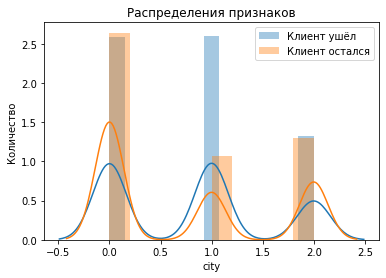

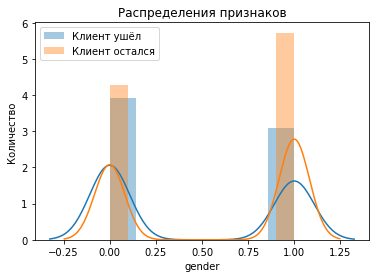

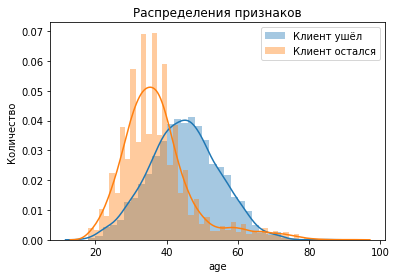

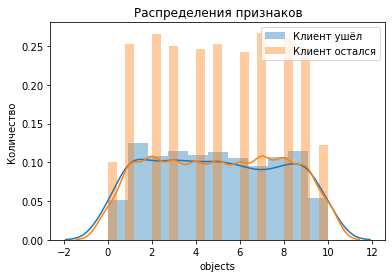

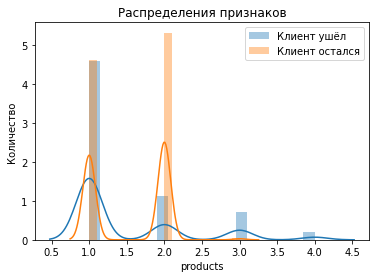

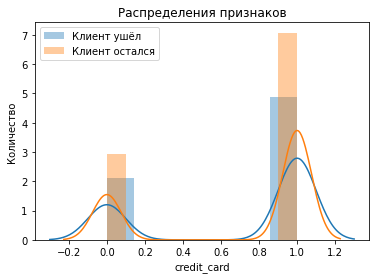

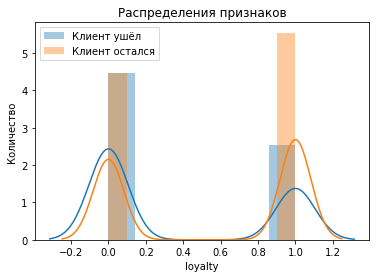

In [21]:
# Построим столбчатые гистограммы и распределения
values1 = ['city','gender','age','objects','products','credit_card','loyalty']
fig, ax = plt.subplots()
for column in values1:
    plt.title('Распределения признаков')
    plt.xlabel(column)
    plt.ylabel('Количество')
    sns.distplot(churn_1[column], label='Клиент ушёл')    
    sns.distplot(churn_0[column], label='Клиент остался')
    plt.legend()
    plt.show()

<b>Вывод:</b> 

Что мы видим из графиков: 

- `city` — город - 3 города Ярославль(0), Ростов Великий(1), Рыбинск(3) - по какой-то причине в Ростове Великом кол-во тех кто ушел в два раза выше тех кто остался, в остальных двух городах примерно поровну.

- `gender` — пол - М(0), Ж(1) - среди женщин ушедших в два раза меньше чем остающихся, у мужчин этот параметр +- одинаков.

- `age` — возраст - до 40 преобладают те кто остался, после те кто уходит.

- `objects` — количество объектов в собственности - кол-во тех кто ушел вне зависимости от кол-ва объектов примерно в 2 раза меньше.

- `products` — количество продуктов, которыми пользуется клиент - 1 продукт одинаково, 2 продукта  намного чаще остаются, 3-4 уходят. 

- `credit_сard` — есть ли кредитная карта - отношение между тем кто ушел и остался 1,5 в пользу оставшихся.

- `loyalty` — активный клиент  - нет -одинаково, да, активный - ушедших в 2 раза меньше.


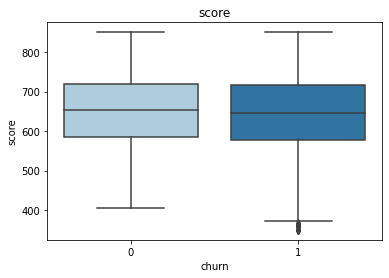

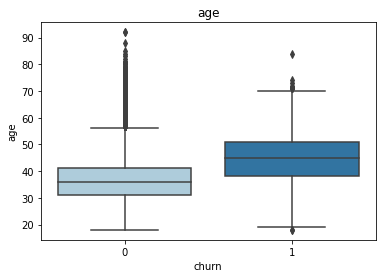

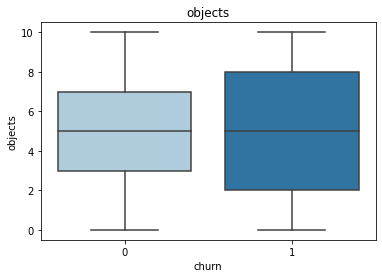

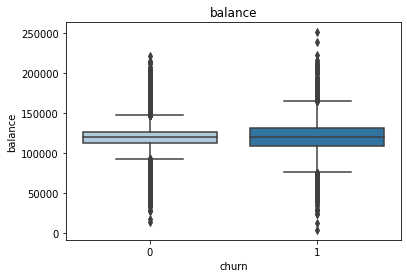

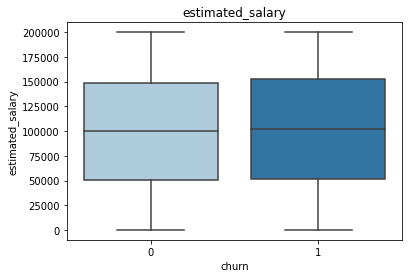

In [22]:
# построим распределение для непрерывных величин
values2 = ['score','age','objects','balance','estimated_salary']
fig, ax = plt.subplots()
for column in values2:
    sns.boxplot(x='churn', y=column, data=df, palette="Paired")
    plt.title(column)
    plt.xlabel('churn')
    plt.ylabel(column)
    plt.show()

<b>Вывод:</b> 

`churn`  0 (Остался) -  1 (Ушел).

- `score` — баллы кредитного скоринга - одинаково
- `age` — возраст - у тех кто остался выше средний возраст, но и у тех то ушел много выбросов в старшей группе
- `objects` — количество объектов в собственности - остался 3-7, ушел - 2-8
- `balance` — баланс на счёте - у тех кто ушел больше диапазон среднего.
- `estimated_salary` — заработная плата клиента - у тех кто ушел чуть выше.

### Построим матрицу корреляции.

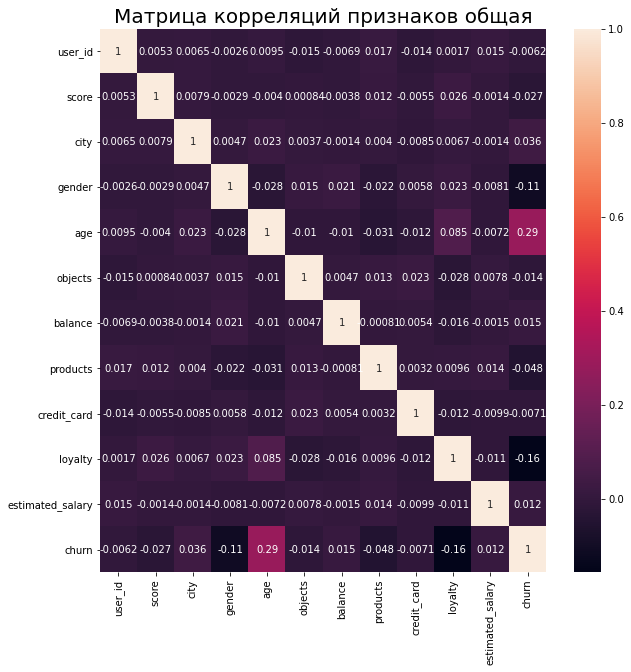

In [23]:
matr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков общая', fontsize = 20)
plt.show()

Из общих данных выделяется только корреляция возвраста с оттоком.

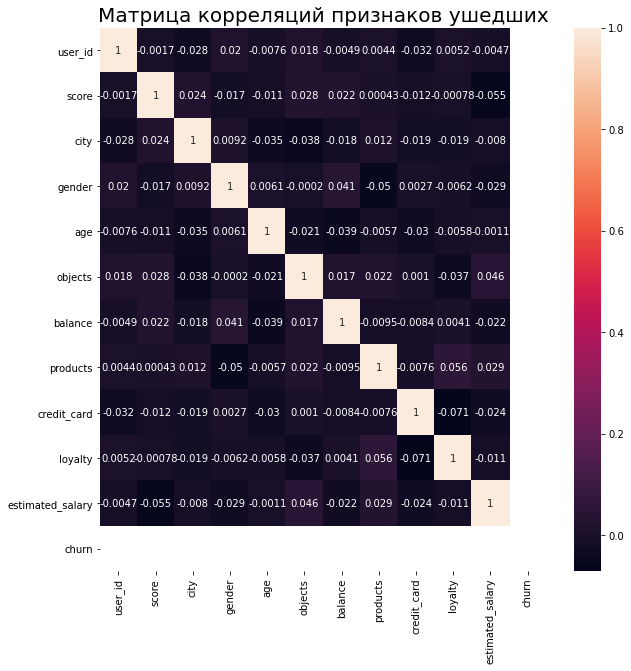

In [24]:
matr = churn_1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков ушедших', fontsize = 20)
plt.show()

Данные по тем кто ушел, нет сильных зависимостей.

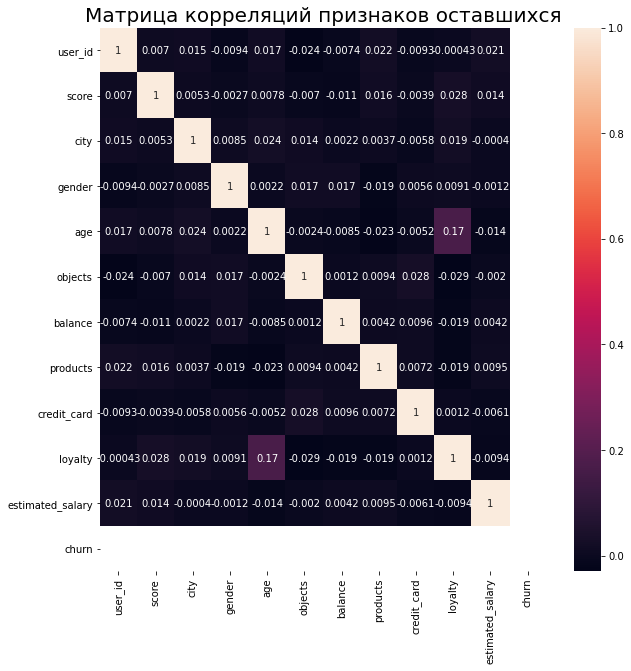

In [25]:
matr = churn_0.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков оставшихся', fontsize = 20)
plt.show()

По данным тех кто остался коррелируют лояльность и возраст.

### Портрет клиента.

<b>Клиент который остается.</b>

- Больше клиентов мужчин.
- Средний возраст 37 лет.
- Более активный клиент.
- Пользователь 2-х продуктов.
- Пользуется кредиткой.

<b>Клиент который ушел.</b>

- Больше клиентов женщин склонны к оттоку.
- Средний возраст 45 лет.
- Странный отток клиентов из Ростов Великий.
- Пользователь 3-4 продуктов.


### Строим модель прогнозирования оттока клиентов.

Построем модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [26]:
# разделим данные
X = df.drop(['user_id'], axis=1) # уберем столбец user_id
X = X.drop(['churn'], axis = 1)
y = df['churn']

# разобъем данные на обучающую и валидационную выборку 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучаем модель

# зададим алгоритм для модели логистической регрессией и обучим модель
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)

# зададим алгоритм для модели случайный лес и обучим модель
model_rfc = RandomForestClassifier(random_state=0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

In [27]:
# модель логистической регрессии
y_pred=model_lr.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test, y_pred)

display('Accuracy: {:.2f}'.format(accuracy))
display('Precision: {:.2f}'.format(precision))
display('Recall: {:.2f}'.format(recall))

'Accuracy: 0.78'

'Precision: 0.30'

'Recall: 0.05'

In [28]:
# модель случайного леса
y_pred2=model_rfc.predict(X_test)
accuracy2=accuracy_score(y_test, y_pred2)
precision2=precision_score(y_test,y_pred2)
recall2=recall_score(y_test, y_pred2)

display('Accuracy: {:.2f}'.format(accuracy2))
display('Precision: {:.2f}'.format(precision2))
display('Recall: {:.2f}'.format(recall2))

'Accuracy: 0.86'

'Precision: 0.74'

'Recall: 0.48'

<b> Вывод:</b>  Алгоритм случайный лес в данном случает оказался точнее.

### Сделаем кластеризацию клиентов

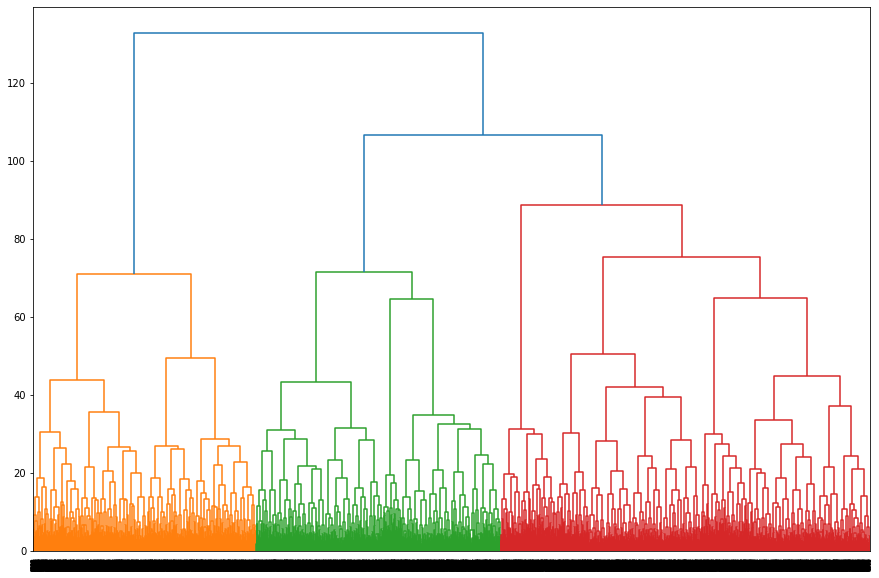

In [29]:
# стандартизируем данные
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

# строим матрицу
linked=linkage(X_st, method='ward')
# строим дендрограмму
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

 <b> Вывод: </b> По дендрограмме можно выделить как минимум 3 кластера. Я бы выбрал 4.

In [30]:
# обучаем модель кластирезации
km=KMeans(n_clusters=4, random_state=0)
labels=km.fit_predict(X_st)

In [31]:
# применим группировку по кластерам и выведем среднее
df['cluster']=labels
df.groupby(['cluster']).mean().sort_values('churn',ascending=False)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
cluster,,,,,,,,,,,,
0,15733650.32,652.13,0.77,0.55,60.83,4.93,119911.05,1.43,0.76,0.82,92112.45,0.36
3,15733501.50,650.04,0.75,0.00,36.63,5.01,119289.94,1.56,1.00,0.46,100954.14,0.23
1,15735581.15,651.74,0.76,0.54,36.94,4.93,119474.26,1.54,0.00,0.49,101837.92,0.20
2,15732332.28,649.50,0.73,1.00,35.82,5.10,120527.26,1.53,1.00,0.48,100390.52,0.14


Самый большой отток в кластере 0, самый маленький в кластере 2.

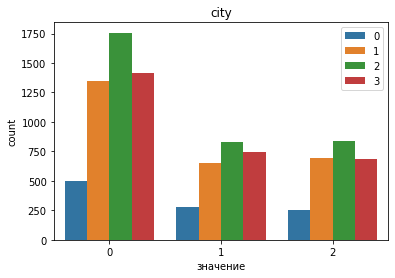

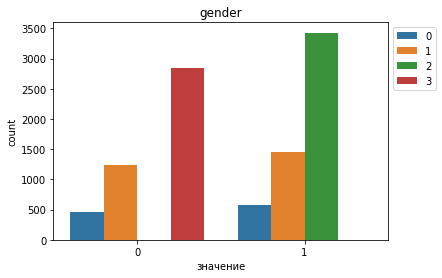

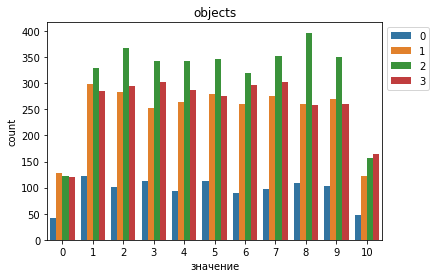

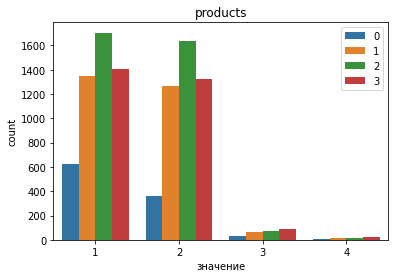

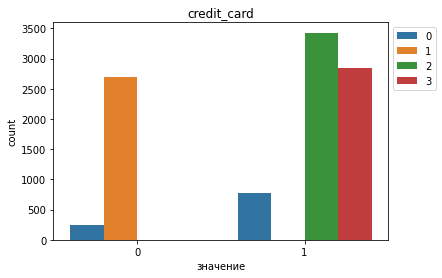

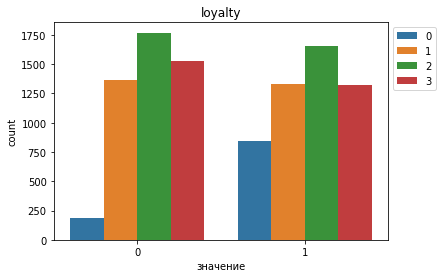

In [32]:
# построим распределение для дискретных величин
values3 = ['city','gender','objects','products','credit_card','loyalty']
fig, ax = plt.subplots()
for column in values3:
    plt.title(column)
    sns.countplot(data=df, x=column, hue='cluster')
    plt.xlabel('значение')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

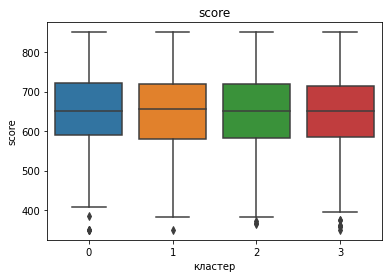

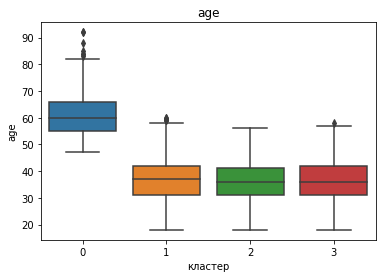

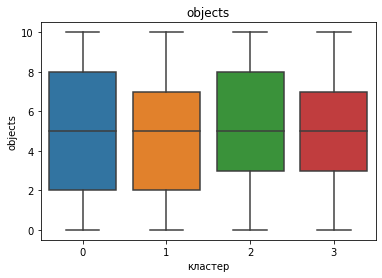

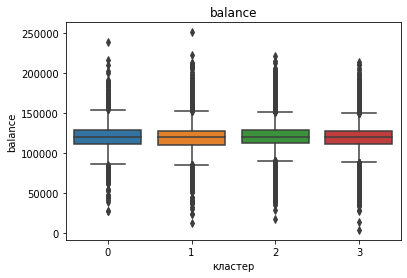

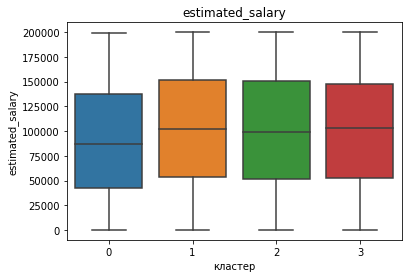

In [33]:
# построим распределение для непрерывных величин
fig, ax = plt.subplots()
for column in values2:
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(column)
    plt.xlabel('кластер')
    plt.ylabel(column)
    plt.show()

<b> Вывод:

Кластеры </b> 

- `score` — баллы кредитного скоринга - по кластерам одинаково.
- `city` — город - города распределены примерно одинаково.
- `gender` — пол Ж(0),М(1) - кластер 2 нет женщин, кластер 3 нет мужчин.
- `age` — возраст - Кластер 0 старше, остальные одинаково.
- `objects` — количество объектов в собственности - Кластер 0 - 2-8, Кластер 1 - 2-7, Кластер 2 3-8, Кластер 3 3-7.
- `balance` — баланс на счёте - по кластерам одинаково. 
- `products` — количество продуктов, которыми пользуется клиент - распределены примерно одинаково.
- `credit_сard` — есть ли кредитная карта - Кластер 2,3 есть карты, Кластер 1 нет карт.   
- `loyalty` — активный клиент - примерно одинаково.
- `estimated_salary` — заработная плата клиента - Кластер 0 с меньшей з/п чем у 3-х других. 


- Кластер 0 - самый большой отток, клиенты старше других кластеров, с меньшим з/п.
- Кластер 1 - третий по оттоку, нет кредитных карт.
- Кластер 2 - самый низкий отток, нет женщин, есть карты.
- Кластер 3 - второй по оттоку, нет мужчин, есть карты.



## Формулировка и проверка статистических гипотез

### Проверить гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Нулевая гипотеза H0 - Различие в среднем доходе между ушедшими и оставшимися клиентами нет.

Альтернативная гипотеза Н1 - Различие в среднем доходе между ушедшими и оставшимися клиентами есть.

In [34]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(churn_0['estimated_salary'], churn_1['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


Различие в среднем доходе между ушедшими и оставшимися клиентами нет.

### Формулирование и проверка статистической гипотезы относительно представленных данных.

Нулевая гипотеза H0 - Различие в среднем возрасте между ушедшими и оставшимися клиентами нет.

Альтернативная гипотеза Н1 - Различие в среднем возрасте между ушедшими и оставшимися клиентами есть.

In [35]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(churn_0['age'], churn_1['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.2399313093427738e-186
Отвергаем нулевую гипотезу


Различие в среднем возрасте между ушедшими и оставшимися клиентами есть.

Нулевая гипотеза H0 - Различие в среднем балле кредитного скоринга между ушедшими и оставшимися клиентами нет.

Альтернативная гипотеза Н1 - Различие в среднем балле кредитного скоринга между ушедшими и оставшимися клиентами есть.

In [36]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(churn_0['score'], churn_1['score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.006738213892192373
Отвергаем нулевую гипотезу


Различие в среднем балле кредитного скоринга между ушедшими и оставшимися клиентами есть.

## Вывод

Задача: Проанализируйте клиентов регионального банка и выделите портрет клиентов, которые склонны уходить из банка.

<b>Вывод:</b> 

Клиенты склонные уходить из банка:

- Женщин склонны к оттоку.
- Более возратсные клиенты, средний возраст 45 лет.
- Странный отток клиентов из Ростов Великий.
- Пользователь 3-4 продуктов.

<b>Рекомендации:</b> 

- Проверить отток клиентов в Ростове Великом.
- Выдавать кредитки.
- Не давать пользователю больше 2 продуктов.

Дополнение у выводу:

Клиенты женщины - отток в среднем в 2 раза больше чем у мужчин - добавить дополнительный продукт, лучше кредитную карту, возможно другие, в сумме не более 2-х.

Возраст более 45 лет - сильный отток - добавить дополнительный продукт, лучше кредитную карту, возможно другие, в сумме не более 2-х, возможно специальные предложения для таких клиентов, системы кэш-бек.

Продукты более 2-х - почти 100% отток владельцев 3-4 продуктов - разобраться, в чем причина, возможно неудобное использование, большие комиссии.

Город Ростов Великий - сильный отток, по сравнению с соседними городами - разобраться, в чем причина, возможно неудобное использование, большие комиссии, выгодное предложение у конкурентов, работа менеджеров в данном городе.
